Tous les documents concernant le cours seront déposés sur `https://github.com/clade/InfoFIP21` 


# Jupyter notebook


* Créer un répertoire pour le TD d'aujourd'hui (nommé par exemple TD1 ou 2020_10_06
* Dans ce répertoire, créer un notebook. 
* Si vous n'êtes par famillier avec les notebook, voici quelques astuces : 
    * Utilisation de la touche 'Tab' pour la complétion automatique
    * Utiliser la combinaiser Ctrl + Entrée pour valider une celluler
    * Menu : Cellule -> type de cellule -> markdown pour créer une zone de texte
    
Par exemple, créer au début de votre notebook les blocs suivants (zone de texte et calcul). Il est possible de rentrer des équations en utilisant le format latex : \\$E=mc^2\\$

In [1]:
# ----------------------------------

## Relativité

Tout le monde connait la formule $E=mc^2$. Mais que vaut exactement l'énergie de masse d'une pomme de 200g ?

In [2]:
masse_d_une_pomme = 0.2
c = 3E8

energie_masse_pomme = masse_d_une_pomme*c**2
print(f"L'énergie de masse d'une pomme est {energie_masse_pomme:.3e} J")

L'énergie de masse d'une pomme est 1.800e+16 J


In [3]:
# ----------------------------------

# Numpy
Dans ce TD, nous allons utiliser numpy et matplotlib. Voici comment les importer

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

Voici quelques fonctions de numpy que nous allons utiliser:
- `np.arange`
- `np.sum`
- `np.polyfit`
- `np.mean`
- `np.std`

Certaines de ces fonctions sont aussi accessibles sous forme de méthode d'un tableau (par exemple np.mean(a) <=> a.mean())

On peut accéder à la documentation de la façon suivante : 

In [2]:
np.sum?

# Formule de Simpson

On rappelle la formule de Simpson pour le calcul approché d’une intégrale :
\begin{equation*}
\begin{split}
\int_a^bf(x)\mathrm dx \approx \Delta_x\sum_{i=0}^{N-1}\frac{f(x_i) + 4f(x_i+\frac{\Delta_x}2) + f(x_i + \Delta_x)}6 \equiv I(f;a,b,N) \end{split}
\end{equation*}
où $\Delta_x =\frac{b-a}N$ et $x_i = a + i\Delta_x$.
  
1. Ecrivez une fonction `simpson_slow` qui calcule l’intégrale d'une function $f$ entre $a$ et $b$ avec $N$ pas avec la méthode de Simpson en utilisant une boucle (for loop).

2. Ecrivez une autre fonction `simpson_fast` qui fait la même chose sans utiliser de boucle (on suposera que la fonction $f$ est vectorisée).

3. Calculez l’intégrale de $f(x) = \frac{1}{1+x^2}$ entre 0 et 1 pour $N=1000$ et comparez le temps entre les deux foncion en ecrirant `%timeit` avant la commande.

4. Calculez la valeur théorique $I^\star$ de l'intégrale et tracez en échelle logarithmique le residu $|I^\star - I(f,0,1,N)|$ par rapport à $N$. Qu'elle est la vitesse de convergence de cette intégrale ?

In [5]:
# 1.

def simpson_slow(f, a, b, N):
    dx = (b-a)/N
    x = a + np.arange(N)*dx
    integral = 0
    for i in range(N):
        integral += (f(x[i]) + 4*f(x[i]+dx/2) + f(x[i]+dx))*dx/6
    return integral

In [6]:
# 2.

def simpson_fast(f, a, b, N):
    dx = (b-a)/N
    x = a + np.arange(N)*dx
    return np.sum(f(x) + 4*f(x+dx/2) + f(x+dx))*dx/6

In [7]:
# 3.

def f(x):
    return 1/(1+x**2)

print("Temps d'exécution pour simpson_slow:")
%timeit simpson_slow(f, 0, 1, 1000)
print('\n')
print("Temps d'exécution pour simpson_fast:")
%timeit simpson_fast(f, 0, 1, 1000)

Temps d'exécution pour simpson_slow:
1.9 ms ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Temps d'exécution pour simpson_fast:
22.7 µs ± 95.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


La solution analytique de l'intégrale est : $\int_0^1 \frac{dx}{1+x^2} = \arctan(x)|_0^1 = \pi/4$

In [8]:
N_array = np.arange(6,30)
residuum = []
for N in N_array:
    residuum.append(np.pi/4-simpson_fast(f, a=0, b=1, N=N))
# Remarque : utiliser une boucle for ici ne ralentit pas le code car
# 1/ le calcule de simpson prend relativement beaucoup de temps
# 2/ il y a moins de 30 itérations

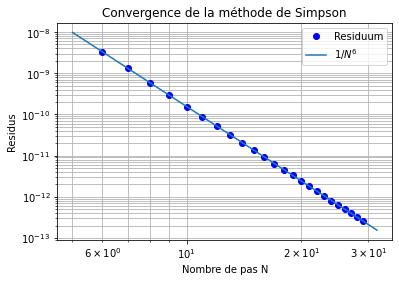

In [19]:
# 5.

plt.loglog(N_array, residuum, 'bo', label='Residuum')
plt.title('Convergence de la méthode de Simpson')
plt.grid(which = 'both')
plt.ylabel('Residus')
plt.xlabel('Nombre de pas N')

TN = np.logspace(0.7, 1.5)
plt.loglog(TN, residuum[0]*(N_array[0]/TN)**6, label='$1/N^6$')

plt.legend()
#gradient = np.polyfit(np.log(N_array), np.log(residuum), 1)[0]
#print(f"L'intégrale converge en res(N)~ N^({gradient:0.1f})")

# Statistiques sur le COVID-19

Le fichier `data_exo_1.dat` contient trois colonnes : la première est la date, la seconde le nombre cumulé de décès en hôpital liés au COVID-19 et la troisième le nombre cumulé de décès en EHPAD liés au COVID-19.

Le fichier commence le lundi 2 mars 2020. C'est l'origine de nos dates (jour 0). Dans la suite, on entend par date ou numéro du jour le nombre de jours écoulés depuis le 2 mars 2020. Ce fichier a été extrait de la base de donnée en janvier 2020 (il ne comprend donc que la première et début de la deuxième vague).

* Lire ce fichier à l'aide de la commande loadtxt, et extraire les trois colones dans trois variables.

In [20]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

In [21]:
date, deces_hopital, deces_ehpad = np.loadtxt('data_exo_1.dat', unpack=True)

* Tracer le graphe du nombre de décès cumulé en hôpital et en EHPAD en fonction de la date.

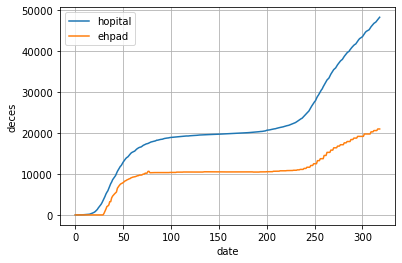

In [22]:
plt.plot(date, deces_hopital, label="hopital")
plt.plot(date, deces_ehpad, label="ehpad")

plt.grid()
plt.xlabel("date")
plt.ylabel("deces")
plt.legend()

* Ajouter sur le même graph le nombre totoal de décés cumulé

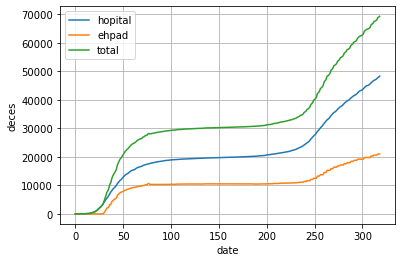

In [23]:
plt.plot(date, deces_hopital, label="hopital")
plt.plot(date, deces_ehpad, label="ehpad")
plt.plot(date, deces_hopital + deces_ehpad, label="total")

plt.grid()
plt.xlabel("date")
plt.ylabel("deces")
plt.legend()

* Au cours des 30 premiers jours, le nombre cumulé de décès en hôpital suit une loi proche d'une exponentielle. Tracer cette courbe en échelle semi-logarithmique.

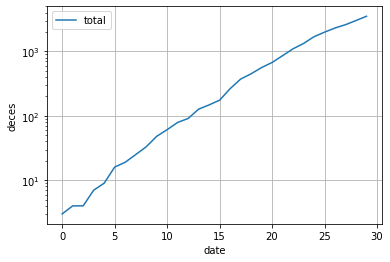

In [24]:
plt.semilogy(date[:30], deces_hopital[:30], label="total")

plt.grid()
plt.xlabel("date")
plt.ylabel("deces")
plt.legend()

* Au cours de ces 30 premiers jours, le nombre de décès peut s'écrire $N(j) = N_0(1+a)^{j-j_0}$. Tracer cette courbe avec les paramètres pour lesquels elle s'ajuste bien à l'œil. Quelle est la valeur de $a$? (Nous ne demandons pas dans cette question de faire un ajustement, mais simplement de superposer les deux courbes).

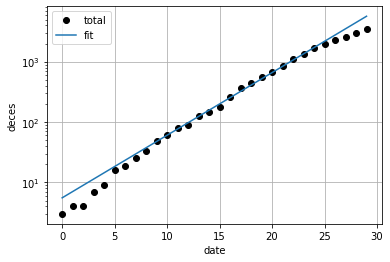

In [25]:
plt.semilogy(date[:30], deces_hopital[:30], "ok", label="total")

N0 = 200
j0 = 15
a = 0.27
j = np.arange(30)

plt.plot(j, N0*(1+a)**(j-j0), label="fit")

plt.grid()
plt.xlabel("date")
plt.ylabel("deces")
plt.legend()

* Calculer le tableau du nombre quotidien de décès en hôpital et en EHPAD en fonction de la date. Et tracer la courbe pour l'hôpital. (Remarque, il est possible de faire cette opération sans boucle )

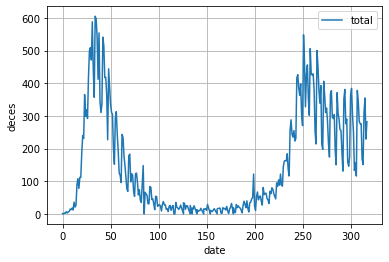

In [26]:
deces_quot_hopital = deces_hopital[1:] - deces_hopital[:-1]
date_quot = date[:-1]

plt.plot(date_quot, deces_quot_hopital, label="total")

plt.grid()
plt.xlabel("date")
plt.ylabel("deces")
plt.legend()

* Quel jour a connu le plus grand nombre de décès en hôpital ? (on utilisera la fonction `argmax`)

In [27]:
max(deces_quot_hopital)
argmax(deces_quot_hopital)

34

* Combien de jours ont connu plus de 50 décés en EHPAD ?

In [28]:
np.sum(deces_quot_hopital>50)

185

* Comment extraire en une ligne le nombre de décés pour un jour donné ?

In [29]:
np.sum(deces_quot_hopital[5::7])

4245.0

* Calculer et tracer le nombre total de décès en hôpital par jour de la semaine. Pour quel jour de la semaine enregistre-t-on le moins de décès ?

In [30]:
list_result=[]

for jour in range(7):
    res = np.sum(deces_quot_hopital[jour::7])
    list_result.append(res)
    
list_result    

[8778.0, 7444.0, 7209.0, 6957.0, 5220.0, 4245.0, 8454.0]

Text(0, 0.5, 'deces')

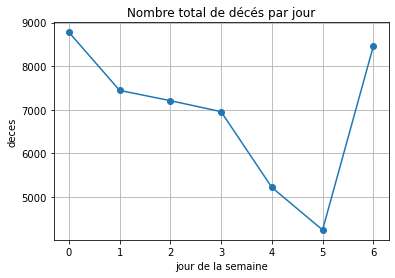

In [32]:
plt.plot(list_result, 'o-')

plt.grid()
plt.title("Nombre total de décés par jour")
plt.xlabel("jour de la semaine")
plt.ylabel("deces")